In [1]:
from numpy import load
data = load('ubipr_labelled.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (6967, 224, 224, 3) (6967,) (3232, 224, 224, 3) (3232,)


In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from required_functions import get_embedding
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [3]:
from numpy import asarray
i = -1
newTrainX = []
for face in trainX:
    i += 1 
    if i%100 == 0: 
        print(i/100, end = ' ')
    embedding = get_embedding(face, model)
    newTrainX.append(embedding.flatten())
newTrainX = asarray(newTrainX)
print('')
print(newTrainX.shape)

i = -1
newTestX = []
for face in testX:
    i += 1
    if i%100 == 0: 
        print(i/100, end = ' ')
    embedding = get_embedding(face, model)
    newTestX.append(embedding.flatten())
newTestX = asarray(newTestX)
print('')
print(newTestX.shape)

0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 
(6967, 25088)
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 
(3232, 25088)


In [4]:
from numpy import savez_compressed
savez_compressed('ubipr_vgg_flattened_embeddings.npz', newTrainX, trainy, newTestX, testy)

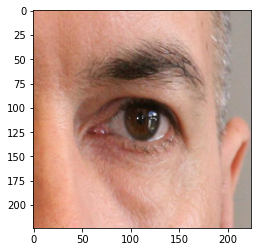

In [3]:
from matplotlib.pyplot import imshow
imshow(trainX[5])